In [2]:
# Versiones Librerias
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy as sp
print('scipy: {}'.format(sp.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn as sk
print('sklearn: {}'.format(sk.__version__))

Python: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
scipy: 1.9.1
numpy: 1.21.5
matplotlib: 3.5.2
pandas: 1.4.4
sklearn: 1.0.2


# Hello World en DataSets
Puedes leer sobre el data set aqui:
https://en.wikipedia.org/wiki/Iris_flower_data_set

Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Posee unas 50 muestras con 4 caracteristicas:
- largo de sepalos [cm]
- largo de petalos [cm]
- ancho de sepalos [cm]
- ancho de petalos [cm]

In [3]:
from sklearn.datasets import load_iris
data = load_iris()

print(data['target_names'])
print(data['target'])

print(data['data'][:5])

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [4]:
species = [data['target_names'][x] for x in data['target']]
data = pd.DataFrame(
    np.column_stack([data['data'], species]),
    columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'],

)

# dejar los datos en el formato correcto
data = data.astype(dtype= 
        {'sepal-length':'float64',
         'sepal-width':'float64',
         'petal-length':'float64',
         'petal-width':'float64',
         'class':'object'})

data

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
data.to_csv('iris.csv', index=False) # guardamos los datos como csv para comodidad

## Herramientas de Skelearn

In [6]:
# Load libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

simple analisis exploratorio

In [7]:
print(f"shape of data: {data.shape}")
print(data.describe())

print("\nClass distribution")
print(data.groupby('class').size())

shape of data: (150, 5)
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Class distribution
class
setosa        50
versicolor    50
virginica     50
dtype: int64


distribuciones de los datos

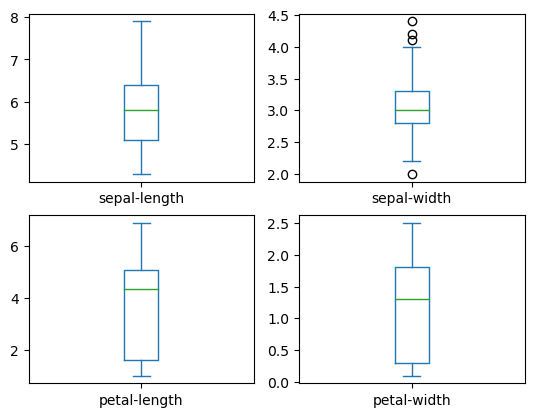

In [8]:
# box and whisker plots
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

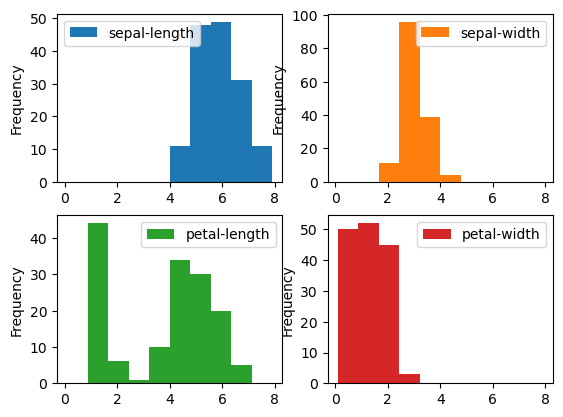

In [9]:
data.plot(kind='hist', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

Es posible observar relaciones mediante el scatter plot matrix


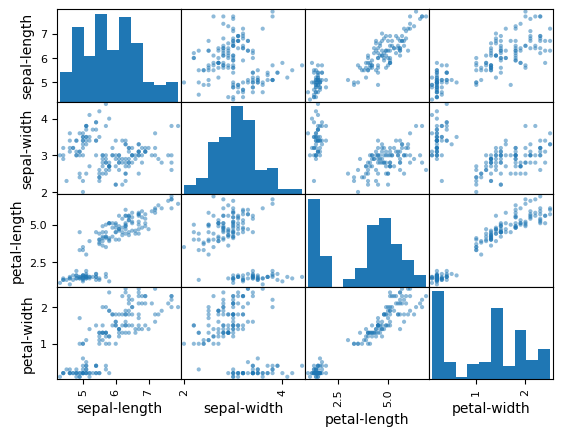

In [12]:
# scatter plot matrix
print("Es posible observar relaciones mediante el scatter plot matrix")
pd.plotting.scatter_matrix(data)
plt.show()

## Evaluar modelos
1- separar el modelo en entrenamiento y validación

2- Construir distintos modelos

3- elegir el mejor modelo

In [13]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train

In [67]:
array = data.values
print(array[:,0:4][:5])
print(array[:,4][:5])

X = array[:,0:4]
Y = array[:,4]

validation_size = 0.20

X_train, X_validation, Y_train, Y_validation = train_test_split(
                X, Y, test_size=validation_size, random_state=1)


[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


10-fold cross validation

dividiremos en 10 partes, entrenamos en 9 y testeamos en 1 para todas las combinaciones de train-test,
estratificado quiere decir que nos concentraremos en tener la misma distribucion de clases.

Utilizaremos los modelos:

Lineales:
* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)

No Lineales:
* K-Nearest Neighbors (KNN).
* Classification and Regression Trees (CART).
* Gaussian Naive Bayes (NB).
* Support Vector Machines (SVM).

In [68]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # ignorar warnings de sklearn stats.mode

def test_models(X_train, Y_train):
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))
    # evaluate each model in turn
    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) # 10-fold cross validation
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f)' % (name, cv_results.mean(keepdims=True), cv_results.std(keepdims=True)))


In [69]:
test_models(X_train, Y_train)

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.038188)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


In [70]:
# aqui utilizamos la normalizacion, para que los datos tengan una media 0 y desviacion standar 1
# standariza.

# lo cual a veces puede signifcar una mejora en ciertos algoritmos y en otros no.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

test_models(X_train_scaled, Y_train)

LR: 0.891667 (0.112114)
LDA: 0.975000 (0.038188)
KNN: 0.950000 (0.055277)
CART: 0.941667 (0.038188)
NB: 0.950000 (0.055277)
SVM: 0.958333 (0.041667)


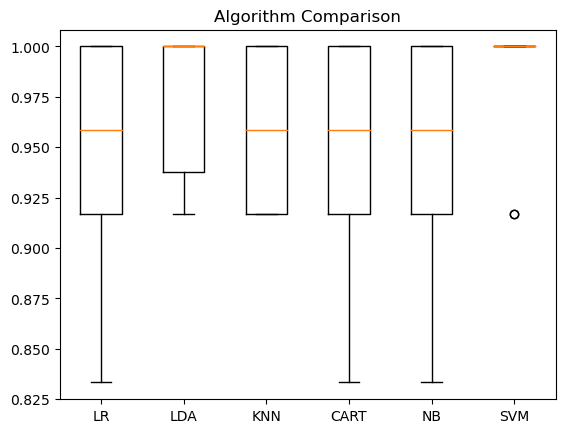

In [73]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [74]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [76]:
# Evaluate predictions
print("Puntaje de la prediccion")
print(accuracy_score(Y_validation, predictions))

print("Matriz de confusion")
print(confusion_matrix(Y_validation, predictions))

print("Reporte de clasificacion")
print(classification_report(Y_validation, predictions))

Puntaje de la prediccion
0.9666666666666667
Matriz de confusion
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Reporte de clasificacion
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Conclusion
No necesitas entender todos los algoritmos y pasos detras de todo, por ahora lo importante es que seamos capaces de lograr un minimo viable capaz de conseguir predicciones.

Este approach se trata de aprender a hacer y luego entender como funciona, como enseñarle a una persona a jugar a la pelota y conforme mejora su habilidad, vas introduciendo las reglas.